In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set()

In [2]:
#new results
df = pd.read_csv("pretrainingOutput.csv")
df = df[df["Date Category"] == 2]

df["Participant ID"].unique()

array(['5ad0f1934d061300011b0a4d', '570e6b4fc9e604000f020a6f',
       '612eac9f6c232dc7efccc967', '62aa265d938c612f7c8361e3',
       '55ae64defdf99b3f864653e7', '5c35dd34be3cea000117948f',
       '616891e25a026e1f7262116c', '5ca3cafa2707e10001a04746',
       '610ce0a48fc7e68abc4070c1', '613116efc0cb4b7e8d532855',
       '5b27c8c9051c6e00019d0c96', '602454a47d0d7d121a1e444b',
       '6171e05a8bd75852eeb6b0bc', '6101c49c2727ad36a6c593af',
       '6113a86e9e254bad97528743', '56435b83942576000a66eb5d',
       '5f72adea4576d21f8ac889a0', '60c7c096903b9b083aa00c4f',
       '62c3430ae19d78462af9e743', '62b29802f626d80a1caed506',
       '627935c4e5d7e70b502e206e', '5974ce5364b35a00019dd811',
       '5e5cc9ce92d80948da643ebc', '62b443cd6bb4a97f543cb73e',
       '5a607a7eac56240001544493', '611622ddd8be1ac51298cb89',
       '613aaf8a8dc36e94fa4f1ba7', '5c7cf1adc8c9920015d0bc60',
       '6113d948bcb1f232c85bdcf3', '5a22d662d6fdbc00011c92ce',
       '6147c45e2fd30e98355c1e52', '61015f63f9a351d3171

In [3]:
# overall main question correctness rate
df[(df["Correctness"] != -1)]["Correctness"].mean()

0.6245954692556634

In [4]:
#baseline main question correctness rate
df_baseline_eval = df[(df["Prompt Condition"] == 0) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]
df_baseline_eval["Correctness"].mean()

0.7366071428571429

In [5]:
#quiz group main question correctness rate
df_quiz_eval = df[(df["Prompt Condition"] == 1) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]
df_quiz_eval["Correctness"].mean()

0.59375

In [6]:
#dict of collectSharePairs
collectSharePairs = {'Q1215': 'Q1233', 'Q1263': 'Q1264', 'Q1236': 'Q1234', 'Q1241': 'Q1242', 'Q1271': 'QID1277', 'Q1265': 'Q1266', 'Q1259': 'Q1260', 'Q1253': 'Q1254', 'Q1247': 'Q1248', 'Q1245': 'Q1246', 'Q1243': 'Q1244', 'Q1249': 'Q1250', 'Q1251': 'Q1252', 'Q1214': 'Q1231', 'Q1237': 'Q1238', 'Q1239': 'QID1245', 'Q1269': 'Q1270', 'Q1267': 'Q1268', 'Q1261': 'Q1262', 'Q1257': 'Q1258', 'Q1255': 'Q1256'}

In [67]:
collectDescriptions = dict()
description_list = df["Description"].values.tolist()
question_list = df["Question ID"].values.tolist()
for question in collectSharePairs:
    row = question_list.index(question)
    description = description_list[row]
    end = description.index("\n")
    collectDescriptions[description[:end].strip()] = question
print(collectDescriptions)

{'Data usage scenario: Our app accesses GPS location and sends it to our server.': 'Q1215', "Data usage scenario: Our app requests for the user's full name and only sends the pseudonymized name to our server. (A pseudonymized name does not allow the individual to be directly identified, but it can be re-associated with the user if additional information is provided)": 'Q1263', "Data usage scenario: We send the user's GPS location stored on our server to a third party server.": 'Q1236', 'Data usage scenario: Our app accesses GPS location and sends it directly to a third party server via libraries and/or SDKs included in our app.': 'Q1241', "Data usage scenario: Our app accesses GPS location and stores it on Google's server using Google Cloud Storage. (Assume that Google doesn't use the GPS location for other purposes)": 'Q1271', 'Data usage scenario: Our app accesses the user’s GPS location and sends it to government agencies in response to a legal request.': 'Q1265', "Data usage scenar

0.7351190476190477 0.5952380952380952


<BarContainer object of 2 artists>

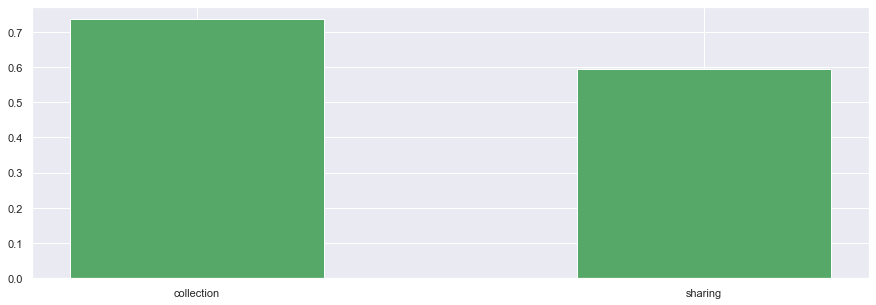

In [7]:
#collect and share only correctness rates
collectAverage = 0
shareAverage = 0
for question in collectSharePairs:
    shareQ = collectSharePairs[question]
    cqOnly = df[(df["Question ID"] == question)]
    sqOnly = df[(df["Question ID"] == shareQ)]
    collectAverage += cqOnly["Correctness"].mean()
    shareAverage += sqOnly["Correctness"].mean()
collectAverage /= len(collectSharePairs)
shareAverage /= len(collectSharePairs)
print(collectAverage, shareAverage)
typeDict = {"collection": collectAverage, "sharing": shareAverage}
plt.figure(figsize=(15,5))
plt.bar(typeDict.keys(), typeDict.values(), width=.5, color='g')

<BarContainer object of 21 artists>

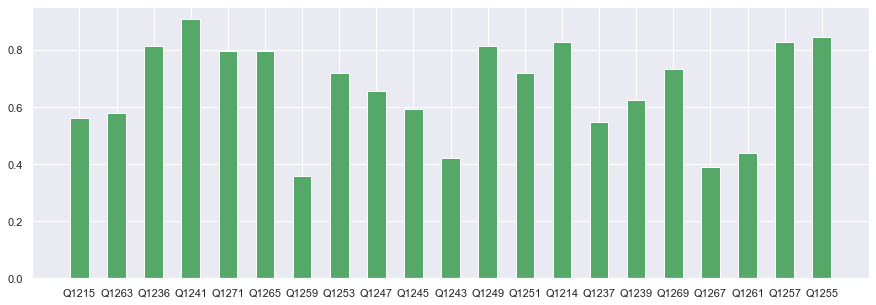

In [71]:
#correct answer rate for each question (non-pretraining)
questionAvg = dict()
for question in collectSharePairs:
    shareQ = collectSharePairs[question]
    cqOnly = df[(df["Question ID"] == question)]
    sqOnly = df[(df["Question ID"] == shareQ)]
    collectAverage = cqOnly["Correctness"].mean()
    shareAverage = sqOnly["Correctness"].mean()
    newAverage = (collectAverage + shareAverage)/2
    questionAvg[question] = newAverage
plt.figure(figsize=(15,5))
plt.bar(questionAvg.keys(), questionAvg.values(), width=.5, color='g')




In [78]:
#new results
df = pd.read_csv("pretrainingOutput.csv")
df = df[df["Date Category"] == 2]

df["Participant ID"].unique()

array(['5ad0f1934d061300011b0a4d', '570e6b4fc9e604000f020a6f',
       '612eac9f6c232dc7efccc967', '62aa265d938c612f7c8361e3',
       '55ae64defdf99b3f864653e7', '5c35dd34be3cea000117948f',
       '616891e25a026e1f7262116c', '5ca3cafa2707e10001a04746',
       '610ce0a48fc7e68abc4070c1', '613116efc0cb4b7e8d532855',
       '5b27c8c9051c6e00019d0c96', '602454a47d0d7d121a1e444b',
       '6171e05a8bd75852eeb6b0bc', '6101c49c2727ad36a6c593af',
       '6113a86e9e254bad97528743', '56435b83942576000a66eb5d',
       '5f72adea4576d21f8ac889a0', '60c7c096903b9b083aa00c4f',
       '62c3430ae19d78462af9e743', '62b29802f626d80a1caed506',
       '627935c4e5d7e70b502e206e', '5974ce5364b35a00019dd811',
       '5e5cc9ce92d80948da643ebc', '62b443cd6bb4a97f543cb73e',
       '5a607a7eac56240001544493', '611622ddd8be1ac51298cb89',
       '613aaf8a8dc36e94fa4f1ba7', '5c7cf1adc8c9920015d0bc60',
       '6113d948bcb1f232c85bdcf3', '5a22d662d6fdbc00011c92ce',
       '6147c45e2fd30e98355c1e52', '61015f63f9a351d3171

<BarContainer object of 21 artists>

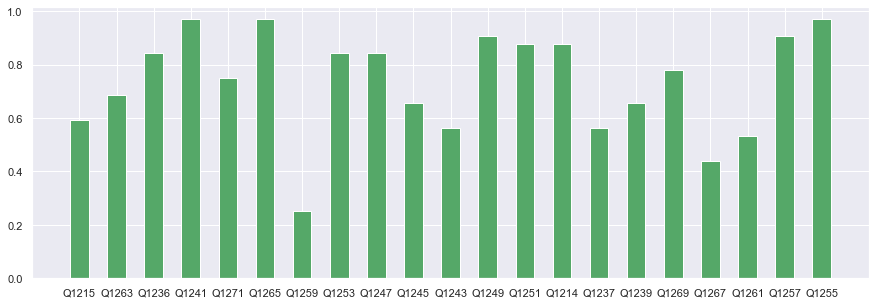

In [83]:
#correctness for baseline vs. quiz group, each question
questionAvgBaseline = dict()
df_baseline_eval = df[(df["Prompt Condition"] == 0) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]
for question in collectSharePairs:
    shareQ = collectSharePairs[question]
    cqOnly = df_baseline_eval[(df_baseline_eval["Question ID"] == question)]
    sqOnly = df_baseline_eval[(df_baseline_eval["Question ID"] == shareQ)]
    collectAverage = cqOnly["Correctness"].mean()
    shareAverage = sqOnly["Correctness"].mean()
    newAverage = (collectAverage + shareAverage)/2
    questionAvgBaseline[question] = newAverage
plt.figure(figsize=(15,5))
plt.bar(questionAvgBaseline.keys(), questionAvgBaseline.values(), width=.5, color='g')


<BarContainer object of 21 artists>

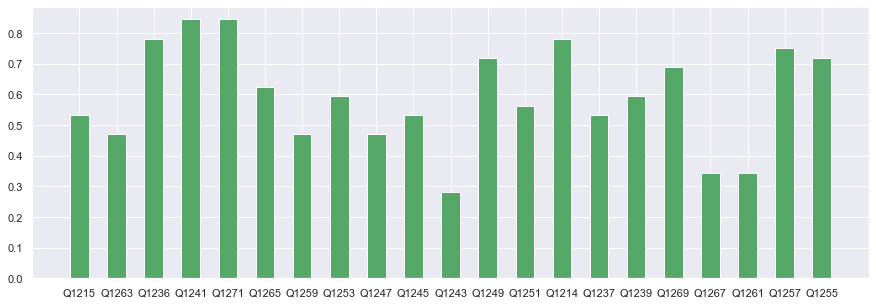

In [84]:
df_quiz_eval = df[(df["Prompt Condition"] == 1) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]
questionAvgQuiz = dict()
for question in collectSharePairs:
    shareQ = collectSharePairs[question]
    cqOnly = df_quiz_eval[(df_quiz_eval["Question ID"] == question)]
    sqOnly = df_quiz_eval[(df_quiz_eval["Question ID"] == shareQ)]
    collectAverage = cqOnly["Correctness"].mean()
    shareAverage = sqOnly["Correctness"].mean()
    newAverage = (collectAverage + shareAverage)/2
    questionAvgQuiz[question] = newAverage
plt.figure(figsize=(15,5))
plt.bar(questionAvgQuiz.keys(), questionAvgQuiz.values(), width=.5, color='g')

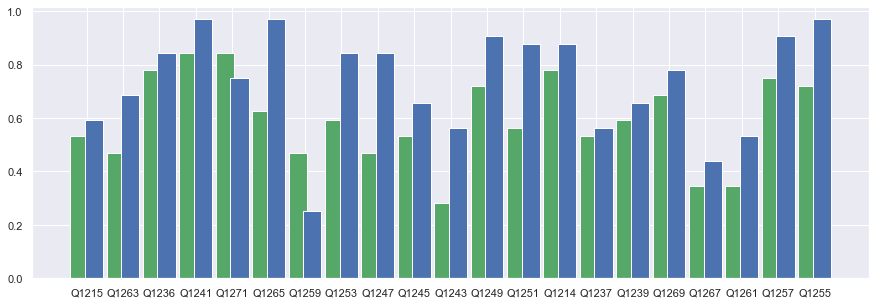

In [90]:
X_axis = np.arange(len(questionAvgQuiz.keys()))
plt.figure(figsize=(15,5))

plt.bar(X_axis - 0.2, questionAvgQuiz.values(), width=.5, color='g', label = "Quiz")
plt.bar(X_axis + 0.2, questionAvgBaseline.values(), width=.5, color='b', label = "Baseline")
plt.xticks(X_axis, questionAvgQuiz.keys())
plt.show()

<AxesSubplot:xlabel='Fluency Level', ylabel='Correctness'>

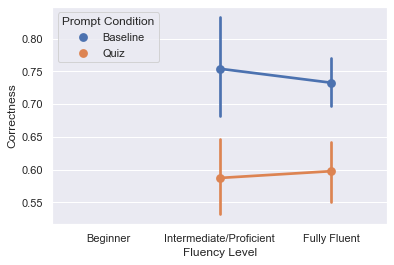

In [9]:
#analysis of fluency level
df["Fluency Level"] = df["Fluency Level"].map({"Intermediate": "Intermediate/Proficient", "Proficient":"Intermediate/Proficient", "Fully Fluent" : "Fully Fluent", "Beginner":"Beginner"})
df["Prompt Condition"] = df["Prompt Condition"].map({0: "Baseline", 1:"Quiz"})
df = df[(df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]
sns.pointplot(data=df, x="Fluency Level", y="Correctness", hue="Prompt Condition", order=["Beginner", "Intermediate/Proficient", "Fully Fluent"])


In [12]:
#old data
df1 = pd.read_csv("pretrainingOutputOld.csv")

In [13]:
df1[(df1["Correctness"] != -1)]["Correctness"].mean()

0.42363636363636364

In [14]:
#baseline main question correctness rate
df_baseline_eval = df1[(df1["Prompt Condition"] == 0) & (df1["Correctness"] != -1) & (~df1["Question ID"].str.contains("-"))]
df_baseline_eval["Correctness"].mean()

0.5

In [15]:
#quiz group main question correctness rate
df_quiz_eval = df1[(df1["Prompt Condition"] == 1) & (df1["Correctness"] != -1)]
df_quiz_eval["Correctness"].mean()

0.3877005347593583

<BarContainer object of 21 artists>

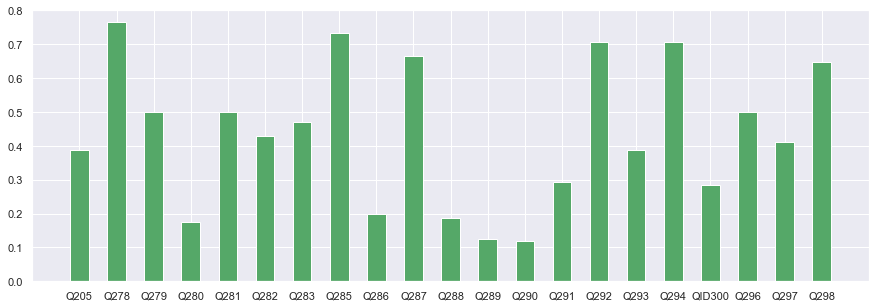

In [25]:
#correct answer rate for each question (non-pretraining)
questionAvg1 = dict()
df1 = df1[(df1["Correctness"] != -1) & (~df1["Question ID"].str.contains("-"))]
for question in df1.loc[:,"Question ID"]:
    if question in questionAvg1:
        continue
    currDf = df1[df1["Question ID"] == question]
    questionAvg1[question] = currDf["Correctness"].mean()
plt.figure(figsize=(15,5))
plt.bar(questionAvg1.keys(), questionAvg1.values(), width=.5, color='g')



Q205
Q278
Q279
Q280
Q281
Q282
Q283
Q285
Q286
Q287
Q288
Q289
Q290
Q291
Q292
Q293
Q294
QID300
Q296
Q297
Q298


<BarContainer object of 21 artists>

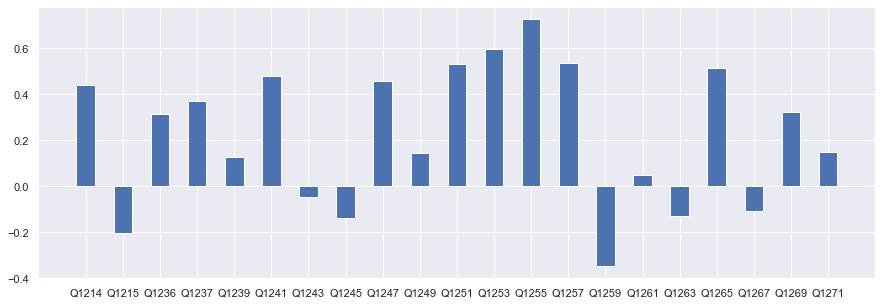

In [69]:
df1 = pd.read_csv("pretrainingOutputOld.csv")
descriptionOld = df1["Description"].values.tolist()
question_listOld = df1["Question ID"].values.tolist()
collectDescriptionsOld = dict()
for question in questionAvg1:
    row = question_listOld.index(question)
    end = descriptionOld[row].index("\n")
    collectDescriptionsOld[question] = descriptionOld[row][:end].strip()
change = dict()
for question in collectDescriptionsOld:
    print(question)
    description = collectDescriptionsOld[question]
    newQID = collectDescriptions[description]
    change[newQID] = questionAvg[newQID] - questionAvg1[question]
plt.figure(figsize=(15,5))
plt.bar(change.keys(), change.values(), width=.5, color='b')

In [92]:
# def miss_one_fn(row):
#     if row["Answer Index"] == 3 and row["Correct Answer Index"] == 0 and row["Question Category"] == "share exempt":
#         return 1
#     else:
#         return 0
#
# baseline_miss_one = df_baseline_eval[(df_baseline_eval["Correct Answer Index"] == 0) & (df_baseline_eval["Question Category"] == "share exempt")].apply(miss_one_fn, axis=1)
# print(baseline_miss_one.mean())
#
# quiz_miss_one = df_quiz_eval[(df_quiz_eval["Correct Answer Index"] == 0) & (df_quiz_eval["Question Category"] == "share exempt")].apply(miss_one_fn, axis=1)
# print(quiz_miss_one.mean())

In [ ]:
def miss_one_fn(row):
#     if row["Answer Index"] == 1 and row["Correct Answer Index"] == 2 and row["Question Category"] == "share special":
#         return 1
#     else:
#         return 0
#
# baseline_miss_one = df_baseline_eval[(df_baseline_eval["Correct Answer Index"] == 2) & (df_baseline_eval["Question Category"] == "share special")].apply(miss_one_fn, axis=1)
# print(baseline_miss_one.mean())
#
# quiz_miss_one = df_quiz_eval[(df_quiz_eval["Correct Answer Index"] == 2) & (df_quiz_eval["Question Category"] == "share special")].apply(miss_one_fn, axis=1)
# print(quiz_miss_one.mean())

<AxesSubplot:xlabel='Answer Index', ylabel='Probability'>

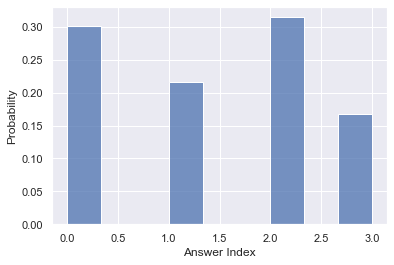

In [165]:
# baseline answer index distribution
sns.histplot(df[(df["Prompt Condition"] == 0) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))], stat="probability", x="Answer Index")

<AxesSubplot:xlabel='Answer Index', ylabel='Probability'>

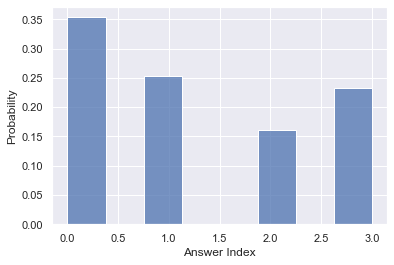

In [166]:
# quiz group answer index distribution
sns.histplot(df[(df["Prompt Condition"] == 1) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))], stat="probability", x="Answer Index")


In [167]:
# Webviews
df_webview = df[df["Concept Group"] == "Webviews"]

print(df_webview[(df_webview["Prompt Condition"] == 0) & (df_webview["Correctness"] != -1)]["Correctness"].mean())
print(df_webview[(df_webview["Prompt Condition"] == 1) & (df_webview["Correctness"] != -1) & (~df_webview["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5666666666666667
0.42105263157894735


In [168]:
# Service Providers
df_concept = df[df["Concept Group"] == "Service Providers"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.4444444444444444
0.6153846153846154


In [169]:
# Optional Data Collection
df_concept = df[df["Concept Group"] == "Optional Data Collection"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.375
0.6666666666666666


In [170]:
# Anonymization
df_concept = df[df["Concept Group"] == "Anonymization"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.0
0.5


In [171]:
# Legal Request
df_concept = df[df["Concept Group"] == "Legal Request"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.4
0.25


In [172]:
# User Consent
df_concept = df[df["Concept Group"] == "User Consent"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.07692307692307693
0.1


In [173]:
# Share Basic
df_concept = df[df["Concept Group"] == "Share Basic"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5
0.5


In [174]:
# Collect Basic
df_concept = df[df["Concept Group"] == "Collect Basic"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.8571428571428571
0.75


In [175]:
# Off-device Server Transfers
df_concept = df[df["Concept Group"] == "Off-device Server Transfers"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.8571428571428571
0.5


In [176]:
# On-device processing and transfers
df_concept = df[df["Concept Group"] == "On-device processing and transfers"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.6666666666666666
0.2727272727272727


In [177]:
# Libraries/SDKs
df_concept = df[df["Concept Group"] == "Libraries/SDKs"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.625
0.375


In [178]:
# End to End Encryption
df_concept = df[df["Concept Group"] == "End to End Encryption"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5555555555555556
1.0


In [179]:
# Ephemeral Processing
df_concept = df[df["Concept Group"] == "Ephemeral Processing"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5
0.3333333333333333


In [180]:
# Pseudynoymization
df_concept = df[df["Concept Group"] == "Pseudynoymization"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.875
0.5
